# Kmeans clustering : countries with top sellers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
dataset = pd.read_csv('countries_with_top_sellers_fashion_c2c.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 19 non-null     object 
 1   sellers                 19 non-null     int64  
 2   topsellers              19 non-null     int64  
 3   topsellerratio          19 non-null     float64
 4   femalesellersratio      19 non-null     float64
 5   topfemalesellersratio   19 non-null     float64
 6   femalesellers           19 non-null     int64  
 7   malesellers             19 non-null     int64  
 8   topfemalesellers        19 non-null     int64  
 9   topmalesellers          19 non-null     int64  
 10  countrysoldratio        19 non-null     float64
 11  bestsoldratio           19 non-null     float64
 12  toptotalproductssold    19 non-null     int64  
 13  totalproductssold       19 non-null     int64  
 14  toptotalproductslisted  19 non-null     int6

In [7]:
X = dataset.iloc[:,[2,15]].values

In [ ]:
## StandardScaler

In [8]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled

array([[-0.59010743, -0.54952639],
       [-0.59010743, -0.61639466],
       [-0.485322  , -0.58136842],
       [-0.27575114, -0.50813176],
       [-0.59010743, -0.50972386],
       [-0.59010743, -0.59728944],
       [-0.485322  , -0.51609226],
       [-0.59010743, -0.62594726],
       [ 0.66731775,  0.3070242 ],
       [ 2.97259724,  2.892597  ],
       [-0.59010743, -0.52882907],
       [-0.59010743, -0.5511185 ],
       [-0.38053657, -0.27090864],
       [ 1.5056012 ,  0.83719399],
       [-0.59010743, -0.57977632],
       [-0.1709657 , -0.21836929],
       [-0.06618027,  0.66047073],
       [-0.485322  , -0.41738197],
       [ 1.92474292,  2.37357192]])

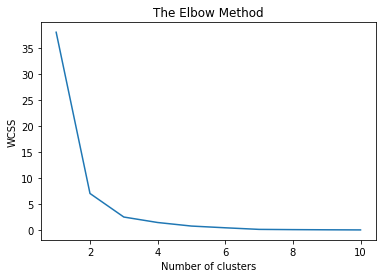

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans=KMeans(n_clusters=3,init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(X_scaled)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1])

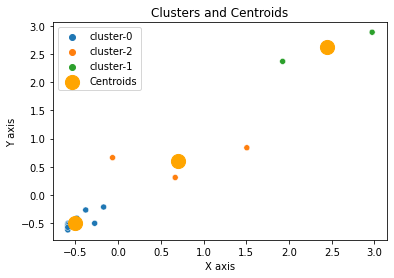

In [11]:
# visualizing the clusters
sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=['cluster-{}'.format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='orange', label='Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

In [12]:
score = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
print(score)

0.7429155534862315


In [14]:
y_kmeans=pd.DataFrame(kmeans.fit_predict(X_scaled))
y_kmeans.columns=['y_kmeans'] # change the column name to 'y_kmeans'

df_out=pd.merge(dataset,y_kmeans,how='left',left_index=True,right_index=True) # merging output with original dataset
df_out.to_csv('c2c_with_clusters.csv')